# What makes a Movie Most Popular, Most Money?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id ='intro'></a>
## Introduction
---

The data that was used was provided by Udacity.com. The data in question was cleaned from the original dataset which was orignally retrieved from Kaggle.com via tmdb's API.

This data set posed some questions, such as:  
* What movie genre is the most popular? Which genre netted the most money?   
* Does the release month affect the popularity? Which movie month netted the most money?  
* Does a high budget mean the movie will be popular?



<a id ='wrangling'></a>
## Data Wrangling
---
* Fill in the null values
* Change release_date into datetime object
* Change the minimum runtimes into median runtimes, because runtime cannot be 0
* Replace zero values in revenue_adj and budjet_adj
* Create net_revenue column

In [1]:
#import all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests #import requests to use api from tmdb.com
%matplotlib inline
pd.set_option('display.max_columns',500)

In [2]:
#read the tmdb movie data set
tmdb = pd.read_csv('tmdb-movies.csv')

In [3]:
print(tmdb.shape)
tmdb.head()

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#get the cols where column is an object
col_is_object= tmdb.dtypes[tmdb.dtypes == 'object'].index

In [7]:
#drop release_date since it is a date-
col_is_object = col_is_object.drop('release_date')

In [8]:
print(col_is_object)

Index(['imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline',
       'keywords', 'overview', 'genres', 'production_companies'],
      dtype='object')


In [9]:
#create loop to fill in na for the cols that are objects
for col in col_is_object:
    tmdb[col].fillna("Data_Missing",inplace = True)#fill NaN with 'Data_Missing'

* The minimum value for runtime is 0 which means it is 0 minutes long, it seems strange  
* change the min to median

In [10]:
print('Some movies have a run time of {}'.format(tmdb['runtime'].min()))
median = tmdb['runtime'].median()
#change the 0 in runtime to the median
tmdb['runtime']= tmdb['runtime'].mask(tmdb['runtime']==0,median)

Some movies have a run time of 0


In [11]:
print('Now the min runtime is {}'.format(tmdb['runtime'].min()))
#this makes sense because some "movies" are actually short films

Now the min runtime is 2


* Change release_date into a datetime object

In [12]:
#change release_date from object to datetime object
tmdb['release_date'] =  pd.to_datetime(tmdb['release_date'],infer_datetime_format=True).copy()
print(tmdb['release_date'].dtype)

datetime64[ns]


Fill in the budget_adj and revenue_adj where values are equal to 0
* Use the mean, because the mode is 0, and the median is 0  

Create a new col, net_revenue

In [13]:
#there are many 0 values in the budget and revenue cols
print((tmdb['budget_adj'] == 0).sum())
print((tmdb['revenue_adj'] == 0).sum())

5696
6016


In [14]:
#Make a variable that holds the means of budget_adj and revenue_adj
budget_mean = tmdb['budget_adj'].mean()
revenue_mean = tmdb['revenue_adj'].mean()

In [15]:
#change 0's in both budget_adj and revenue_adj to their respective means
tmdb['budget_adj']= tmdb['budget_adj'].mask(tmdb['budget_adj']==0,budget_mean)
tmdb['revenue_adj']= tmdb['revenue_adj'].mask(tmdb['revenue_adj']==0,revenue_mean)

In [16]:
#create net_rev column
tmdb['net_rev'] = tmdb['revenue_adj'] - tmdb['budget_adj']

<a id ='eda'></a>
## Exploratory Data Analysis
* Find what <a href="#genre">genre</a> is the most popular/least popular. What genre makes the most money.
* Find out the <a href="#month">release month</a> of most popular movies. Find out which month makes the most money.
* Find out the <a href="#correlation">correlation</a> between budget/revenue and popularity.
-----

### Find number of *'genre'* movies
> Use the tmdb api inorder to find unique genres

Because the genre columns did not have unique values, the unique genres were retrieved from TMDB's API. A loop was created to create a Series with unique genre's and a count for each time that genre was mentioned in the original genre column. It is noted that many movies had many different genres, and so I wanted to get a count of the times a genre occured throughout every movie. So for example a movie with genre "Comedy, Fantasy, Sci-Fi" will contribute to one count to each genre. The number of movies and each genre was then graphed used a bar graph.

In [17]:
#import requests to use api from tmdb.com
import requests

In [18]:
response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=67b6f79d509b5e59d6356f67d759b854&language=en-US')

In [19]:
#Json files with unique movie and movie id
genres = response.json()

In [20]:
movie_genres = []
for genre in genres['genres']:
    movie_genres.append(genre['name'])

In [21]:
#unique movie genres
movie_genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [22]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
id                      10866 non-null int64
imdb_id                 10866 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
homepage                10866 non-null object
director                10866 non-null object
tagline                 10866 non-null object
keywords                10866 non-null object
overview                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj   

In [23]:
#create dictionary to get the occurrence of each genre 
#a movie may contain more than one genre
genre_count = {}
for genre in movie_genres:#loop through the genre list
    num_of = len(tmdb[tmdb['genres'].str.contains(genre,na=False)])#check to see if data has the genre
    genre_count[genre]=num_of #give 

In [24]:
genre_count

{'Action': 2385,
 'Adventure': 1471,
 'Animation': 699,
 'Comedy': 3793,
 'Crime': 1355,
 'Documentary': 520,
 'Drama': 4761,
 'Family': 1231,
 'Fantasy': 916,
 'History': 334,
 'Horror': 1637,
 'Music': 408,
 'Mystery': 810,
 'Romance': 1712,
 'Science Fiction': 1230,
 'TV Movie': 167,
 'Thriller': 2908,
 'War': 270,
 'Western': 165}

In [25]:
#turn the dict into a series so it can be used for plotting
genre_count = pd.Series(genre_count)

In [26]:
#function to create horizontal bar graph
def barh_graph(data,xlabel,title,color): #takes a series object 
    ind = np.arange(len(data))
    plt.figure(figsize=(10,5))
    plt.barh(ind,data.values,alpha = .6, color = color)
    plt.yticks(ind,data.index)
    plt.xlabel(xlabel)
    plt.title(title)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    plt.show()

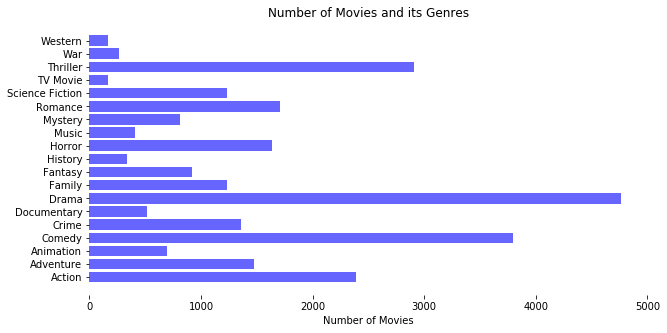

In [27]:
#graph genre_count to check if function works
data = genre_count
xlabel = 'Number of Movies'
title = 'Number of Movies and its Genres'
color = 'blue'
barh_graph(data, xlabel,title,color)

In [28]:
movie_genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

<a id ='genre'></a>
### Find the popularity of each Genre
> Group each unique genre and find the mean popularity for each genre  
> Find the net_revenue for each genre as well

A loop was created to create a dataframe similar to the one above. This time the data was grouped by the unique genres. It was aggregated using the mean and I found the popularity score of each genre. The mean was used because I wanted to determine the popularity of each unique genre. The mean of the net revenues were also found for each genre. Both the popularity and the net revenues for each genres were plotted.

In [29]:
#Create a dataframe where the genre list is unique()
genre_df = pd.DataFrame()
for genre in movie_genres:#loop through the genre list
    gen = tmdb[tmdb['genres'].str.contains(genre,na=False)].copy()
    gen.loc[:,'genres'] = genre
    genre_df= genre_df.append(gen)

In [30]:
genre_df.shape

(26772, 22)

In [31]:
popularity_genre = genre_df.groupby('genres')['popularity'].mean()

In [32]:
print(popularity_genre)

genres
Action             0.926136
Adventure          1.154259
Animation          0.852182
Comedy             0.592607
Crime              0.744821
Documentary        0.181432
Drama              0.591496
Family             0.786668
Fantasy            0.992840
History            0.575936
Horror             0.465357
Music              0.487321
Mystery            0.690012
Romance            0.592082
Science Fiction    1.001218
TV Movie           0.270896
Thriller           0.741513
War                0.727683
Western            0.590615
Name: popularity, dtype: float64


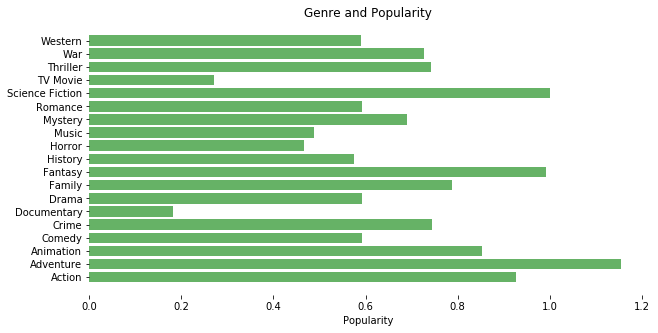

In [33]:
#graph popularity_genre using barh_graph function
data = popularity_genre
xlabel = 'Popularity'
title = 'Genre and Popularity'
color = 'Green'
barh_graph(data,xlabel,title,color)

In [34]:
genre_netrev = genre_df.groupby('genres')['net_rev'].mean()

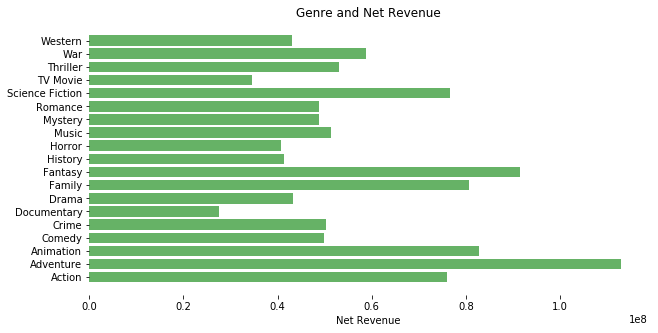

In [35]:
data = genre_netrev
xlabel = 'Net Revenue'
title = 'Genre and Net Revenue'
color = 'Green'
barh_graph(data,xlabel,title,color)

<a id ='month'></a>
### Find the popularity of movies according to release month
> Group data by the months and find the mean popularity for each month  
> Find the mean net_revenue for each month as well

From the release_date cols which was previously turned into a datetime object, the release_month was easily found. the release_month was added into the tmdb data frame. The data was grouped by release month using the aggegrate function meean. The mean was used once again it seems to be a good indicator of the middle compared to the mode and median. The mean popularity and net_revenue was chosen again and plotted against each month.

In [36]:
#create release_month column
tmdb['release_month'] = tmdb['release_date'].dt.strftime('%B')

In [37]:
month_popularity = tmdb.groupby('release_month')['popularity'].mean()

In [38]:
type(month_popularity)

pandas.core.series.Series

In [39]:
#create month order list to sort index by
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [40]:
#sort index by month order
month_popularity = month_popularity.loc[month_order]

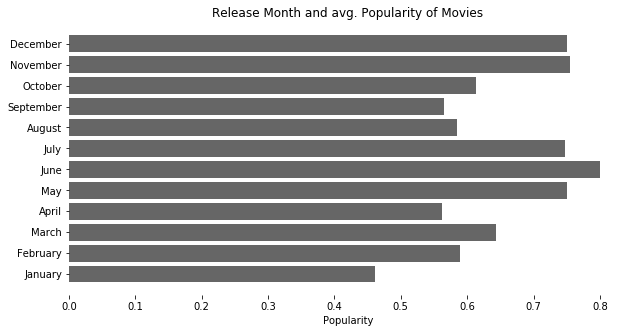

In [41]:
data = month_popularity
xlabel = 'Popularity'
title = 'Release Month and avg. Popularity of Movies'
color = 'black'
barh_graph(data,xlabel,title,color)

In [42]:
month_net_rev = tmdb.groupby('release_month')['net_rev'].mean()
#sort the index by month order
month_net_rev = month_net_rev.loc[month_order]

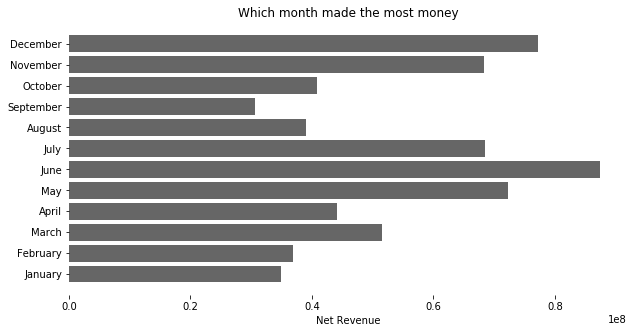

In [43]:
data = month_net_rev
xlabel = 'Net Revenue'
title = 'Which month made the most money'
color = 'black'
barh_graph(data,xlabel,title,color)

<a id ='correlation'></a>
### Find the popularity of movies according to budget
> Categorize the budgets according to different tiers  
> Find popularity score for each month and group by budget  
> Find the correlation between budget/revenue on popularity

The budget was turned from quantitative to qualitative data by categorizing the budget into 4 tiers. The tiers were arbitrary, better ways to categorize the budget should be available, but after searching online it seemed that budget tier systems are inconsistent throughout different companies/unions. The budget categories were graphed using the mean popularity. The popularity of the movies on the budget categories were plotted for each month as well. This was done to check to see if there were any patterns between the months and budget. A regression plot was used inorder to see the correlation between net revenue and popularity.

In [44]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_rev
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.353304,217.389748,5.974922,2001.322658,2.675136e+07,7.980243e+07,5.305106e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,30.903297,575.619058,0.935142,12.812941,3.050850e+07,1.365610e+08,1.206751e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,-4.139124e+08
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07,2.015719e+07
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07,3.381332e+07
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,5.136436e+07,3.903895e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [45]:
#bin budget into four groups
budget_categorized\
= pd.cut(x=tmdb['budget_adj'],bins = [-np.inf,500000,5000000,50000000,np.inf],labels = ['Very Low','Low','Middle','High'])

In [46]:
budget_categorized.value_counts()

Middle      8642
High        1296
Low          719
Very Low     209
Name: budget_adj, dtype: int64

In [47]:
#create new cols for the budget in categories
tmdb['budget_categorized'] = budget_categorized

In [48]:
#create series that shows the popularity of movies and its budget
budget_popularity = tmdb.groupby(tmdb['budget_categorized'])['popularity'].mean()
print(budget_popularity)

budget_categorized
Very Low    0.320413
Low         0.487783
Middle      0.506735
High        1.718625
Name: popularity, dtype: float64


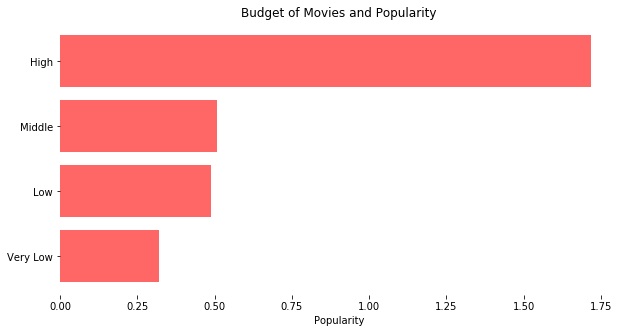

In [49]:
data = budget_popularity
xlabel = 'Popularity'
title = 'Budget of Movies and Popularity'
color = 'Red'
barh_graph(data,xlabel,title,color)

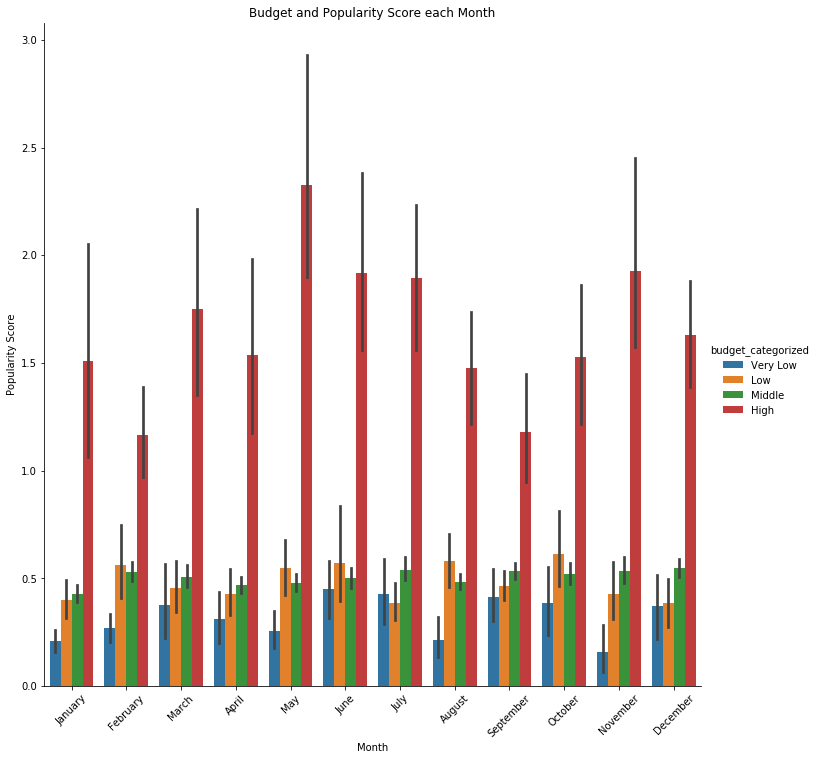

In [50]:
g = sns.catplot(x="release_month", y="popularity", hue="budget_categorized", kind="bar", data=tmdb,height = 10, aspect= 1,order = month_order)
g.set_axis_labels('Month','Popularity Score')
g.set_xticklabels(rotation = 45)
plt.title('Budget and Popularity Score each Month')
plt.show()

In [51]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_rev
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.353304,217.389748,5.974922,2001.322658,2.675136e+07,7.980243e+07,5.305106e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,30.903297,575.619058,0.935142,12.812941,3.050850e+07,1.365610e+08,1.206751e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00,-4.139124e+08
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07,2.015719e+07
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07,3.381332e+07
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,5.136436e+07,3.903895e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


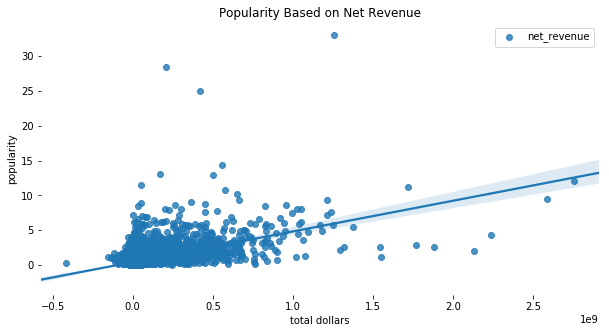

In [52]:
plt.figure(figsize=(10,5))
sns.regplot(x = tmdb['net_rev'], y = tmdb['popularity'],label = 'net_revenue')
plt.ylabel('popularity')
plt.xlabel('total dollars')
for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
plt.title('Popularity Based on Net Revenue')
plt.legend()
plt.show()

<a id = 'conclusions'></a>
## Conclusion
---
From the data it can be seen adventure, science-fiction,fantasy movies were most popular. Although there were many drama and comedy movies, the popularity was around average. There seemed to be a correlation between popularity and net revenue. If a movie is popular, its net revenue will also be high, which makes sense. The more a movie is talked about, more people will watch said movie, and thus revenue will increase.   

Movies in June created the most popular movies and as a result movies in june also had the highest net revenue.

The movies budget had a significant impact on its popularity. As budget increased so did popularity. A greater movie budget meant an increased popularity. This makes sense, because a movie with a high budget may have spent more on advertisements and thus increased its popularity. When graphing each individual month, the pattern between budget and popularity score is similar throughout the months.

* In order to make the most movie from movies try to increase popularity.
* In order to get popular movies, release the movie in June & and have a high budget.
----
There were many limitations to this data. One limitation was that most movies had revenues and budgets with a value of 0, this seems odd as budgets should not be 0. Another limitation was that some budgets listed in this dataframe was inconsistent to that of a google search. The max budget from the tmdb dataframe was not equal to the budget found in google. This may be due to a human error in transferring the data. Another limitation in the data was the way the popularity score was scored. Some movies may have had an increased popularity due to the fact that they were newer. For the future a cleaner data should be obtained with accurate data inputed. The average votes can be used to determine popularity rather than the arbitrary popularity score that was provided.

## References
----
https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf
https://developers.themoviedb.org/3/genres/get-movie-list